Molecular Dynamics
==================

Thus far we have studied the dynamics behavior of systems with only a
few particles. However, many systems in nature such as gases, liquids
and solids contain many mutually interacting particles. A typical
problem involves $%
10^{23}-10^{25}$ molecules which, to a good approximation, obey the laws
of classical physics. Although the intermolecular forces produce a
complicated trajectory for each particle, the observable properties of
the whole are averages that do not depend on the individual behavior.
The motion is completely determined by the classical equations of
motion, and all the physics is contained in the intramolecular
potential, *i.e.* the interactions.

The problem consists in understanding the properties of the whole,
starting from the known interactions. The most direct approach is to
simulate the problem with a computer. The problem of simulating a system
with $%
10^{23}-10^{25}$ particles requires the power of a supercomputer, and
using parallelization techniques. However we can learn the principles
using a fraction of that number, say $10^{4}$ particles, that is
tractable in a PC. Not only we can learn about about many of the instead
of statistical mechanics, but also the basic simulation techniques. The
technique that we will learn in this section does not differ in essence
from that used in supercomputers, and it is called “molecular dynamics”.

The intermolecular potential
----------------------------


Our first goal is to identify the model we want to simulate. The first
simplification is to consider the molecules spherical, chemically inert,
and that they move according to the laws of classical mechanics. We also
assume that the force between molecules depends only on the distance
between them. The form of this potential for electrically neutral atoms
can be constructed from a detailed first principles quantum mechanical
calculation. Such calculation can be complicated, so we will consider a
phenomenological form. The most important features are: **strong
repulsion at short distances, weak attraction at large separations**.
The repulsion originates from the electrostatic interaction between
equally charged particles, and the long range attraction from the mutual
polarization of the electronic clouds, known as “van de Waals” force.

Below we list some model potentials:

$$\begin{array}{ll}
& \mathrm{Hard\,\, Spheres} & V(r)=\infty    \mathrm{\,\,if\,\,} r<r_{o} & \mathrm{First\,\, approximation} \\    
&  &    V(r)=0  \mathrm{\,\,if\,\,} r\geq r_{o}  & \mathrm{in\,\, many\,\, applications} \\
& & & \\
& \mathrm{Lennard-Jones} & V(r)=4\epsilon \left[ \left( \frac{r}{\sigma }\right)^{-12}-\left( \frac{r}{\sigma}\right)^{-6}\right] &  \mathrm{Noble\,\, gas\,\, atoms;\,\, nearly\,\, spherical\,\, molecules} \\
& & & \\
& \mathrm{Harmonic} & V(r)=A(r-r_{o})^{2} & \mathrm{Intramolecular\,\, bonds}
\end{array}$$

Tricks of the trade
-------------------

### Units

Meters and kilograms are not meant to measure molecules. Using these
units would imply the clumsy manipulation of small numbers. We want to
choose units of mass, energy, and length such that the values of the
quantities are always of the order $1$. For instance, in the case of the
Lennard-Jones potential is wise to use $\sigma $ as a unit of length,
$\epsilon $ as a unit of energy, and $m_{0}=1AMU$ as the unit of mass.
Re-scaling by these quantities, the potential would be
$$V^{*}(r)=4\left[ u^{-12}-u^{-6}\right] ,$$ where $V^{*}=V/\epsilon $
and $u=r/\sigma $. The advantages are that the Lennard-Jones parameters
never show in the formulas, and that we are spared of many
computationally expensive calculations. With this choice of units, we
find that time is measured in units of $t_{0}=\sqrt{m_{0}\sigma
^{2}/\epsilon }$. For the electrical charge, the natural unit is the
charge of the electron $e$, and for temperature, $\epsilon /k$. After
finishing the simulation, we transform the results back to the original
units to be compared with the experimental data.

<!--
#### Challenge

Figure out how to rescale the units for argon atoms interacting via a Lennard-Jones potential.
The parameters for Ar are $\epsilon = 0.0104 eV$, $\sigma = 3.40$ ${\buildrel _{\circ} \over {\mathrm{A}}}$. The mass of one argon atom is $m = 39.948 AMU$.
!-->

<!--
**Hint:** The program should use eVs as the unit of energy and temperature (so Boltzmann’s constant is $k_B = 1$), and ${\buildrel _{\circ} \over {\mathrm{A}}}$ for the unit of distance. Time is measured in femtoseconds.
Since the energy is in eV as a function of ${\buildrel_{\circ} \over {\mathrm{A}}}$, the force will be in units of $eV/{\buildrel_{\circ} \over {\mathrm{A}}}$. 
!-->

### Boundary conditions

![pbc](figures/pbc.png)
#### Example of periodic boundary conditions in 2D. Note that particle 1 is about to leave the left face of the central cell and to enter the center cell trhough the right face. The minimum image distance convention inplies that the separation between particles 1 and 2 is given by the bold line

<!--
Since the size of our system is typically 10-100 molecular diameters,
this is certainly not a good representation for a macroscopic sample
because most of the particles will be situated near a “wall” or
“boundary”.!-->

To minimize the effects of the boundaries and to simulate
more closely the properties of the macroscopic system, it is convenient
to choose “periodic boundary conditions”. These means that our basic box
containing $N$ particles is surrounded by images (or replicas) of
itself. This is equivalent to wrap the coordinates around the
boundaries: when one particles hits a wall, instead of bouncing pack, it
reappears on the other side of the box. This means that the system has
the topology of a torus. If the linear size of the box is $L$, the
maximum separation between particles is $L/2$.

The rule can be summarized as follows: instead of the coordinate $x_{i}$
of some particle, we have to adopt
$$(x_{i}+2L)\mathrm{mod}L. $$ In this way the number of
particles in a given box is always conserved. A particle crossing the
right boundary is automatically replaced by a particle entering the
left, and vice versa (Adding $2L$ before the modulo operation is to
catch any runaway particles with $x_{i}<-L$).

To compute the potential energy or the force between two particles $i$
and $j
$ one augments the periodic boundary conditions we have to adopt the
so-called “nearest image convention”. Imagine that the two particles on
opposite sides of the box. The convention dictates that we have to adopt
the minimum distance across the walls, or between images in the
neighboring replicas. If $\Delta x_{ij}=x_{j}-x_{i}$ is larger than
$L/2$, then the particle $j$ will be disregarded as an interaction
partner of $i$, with its left image, having coordinate $x_{j}-L$ in its
place. In practice this means simply that when calculating $V(r_{ij})$
we have to use the quantity $\Delta
x_{ij}-L$ instead of $\Delta x_{ij}$. An analogous rule holds for
$\Delta
x_{ij}\leq -L/2$ and for the other coordinates.

The rule can be expressed by
$$\Delta x=\Delta x-L\mathrm{int}\left( \frac{\Delta x}{L}\right).$$

The rules  can be replaced by "if"
expressions. In a parallel code this is counter productive, but in a
serial code may be preferable. The optimal choice should be based on
benchmarks.

### Starting configuration

![initial](figures/initial.png)
#### Initial configuration with particles in vertices of a a) triangular; b) rectangular lattice

Picking the right starting configuration is
not trivial. The first choice would be to place the molecules randomly
distributed, but this would give rise to large starting energies and
forces, since many pairs would be placed at unphysical short distances.
It is therefore customary to place the particles in the vertices of a
some crystal lattice (face centered cubic –or triangular–, for
instance). The $x$ and $y$ components of the velocities can be picked
randomly in an interval $[-v_{\max },v_{\max }]$. Before starting the
proper simulation and the measurement of the physical quantities, it is
necessary to perform a “thermalization” run to let the system relax to a
situation of dynamical and thermal equilibrium.

Other possibilities consist of arranging the particles in a regular periodic structure as shown in the figure. The velocities are again picked randomly, and the system must evolve for some time to thermalize.

### Adjusting density and temperature

Since the number of particles is usually fixed and conserved, the way to
achieve the desired density is to adjust the volume. This is done
scaling all coordinates by a suitable factor.

In Molecular Dynamics, the temperature is a measurable quantity. Kinetic
theory tells us that $$T=m\langle |\mathbf{v}|^{2}\rangle /3k,$$ where
$k$ is the Boltzmann’s constant, and $\langle |\mathbf{v}|^{2}\rangle $
is the averaged square of the velocity. In a simulation, we have to
average this quantity over a number of MD steps to get a measurement of
$T$. If we want to simulate a particular temperature, we rescale each
component of the velocity vector of every particle by
$\sqrt{T_{desired}/T_{actual}}$. Obviously $T$ is a fluctuating quantity
and can therefore be adjusted only approximately.

MD simulation of Hard Spheres
-----------------------------

To set the initial conditions let us consider the $N$ spheres to be
distributed in a lattice, and with random initial velocities. An
addtional requirement is that the total energy should be consistent with
some desired temperature according to $E=3NkT/2$. Furthermore, is
advantageous to make the total momentum (which will be conserved in the
simulation) equal to zero.

Next, we compute for each pair of particles $(i,j)$ in the system the
time $%
t_{ij}$ that would take the pair to meet:

$$t_{ij}=\frac{-b-\sqrt{b^{2}-v^{2}(r^{2}-d^{2})}}{v^{2}}$$ where $d$ is
the sphere diameter, $r$ is the distance between the centers of $i$ and
$j$ , and

$$\begin{eqnarray}
b &=&(\mathbf{r}_{j}-\mathbf{r}_{i}).(\mathbf{v}_{j}-\mathbf{v}_{i}) \\
v &=&\left| (\mathbf{v}_{j}-\mathbf{v}_{i})\right|\end{eqnarray}$$

For each particle $i$ the smallest positive collision time $t(i)=\min
(\{t_{ij}\})$ and the corresponding collision partner $j(i)$ are
memorized. If the particle has no collision partner at positive times,
we set $j(i)=-1$ and $t(i)=10^{16}$ or the largest representable number.

Evidently this calculation is quite costly, since there are $N(N-1)/2$
pairs to be scanned. However this double loop over all indices has to be
performed only once, at the start of the simulation.

Next we identify the smallest among the $N$ “next collision times”,
calling it $t(i_{0}\dot{)}$ This will give us the time that will pass
until the next collision occurring in the entire system. Let the
partners in this collision be $i_{0}$ and $j_{0}$.

Now all the particle positions are incremented according to the free
motion law $$\mathbf{r}_{i}=\mathbf{r}_{i}+\mathbf{v}_{i}t(i_{0})$$ and
all the $t(i)$ are decreased by $t(i_{0}).$

The elastic collision between the spheres $i=i_{0}$ and $j=j_{0}$ leads
to new velocities of these two particles
$$\mathbf{v}_{i}^{\prime }=\mathbf{v}_{i}+\Delta \mathbf{v,\,\,\,\,v}%
_{j}^{\prime }=\mathbf{v}_{j}-\Delta \mathbf{v}$$ where
$$\Delta \mathbf{v=}b\frac{\mathbf{r}_{ij}}{d^{2}}$$ All pairwise
collision times $t_{ij}$ that involve either $i_{0}$ or $j_{0}$ must now
be recalculated using the new velocities. For this purpose no more than
$2N-3$ pairs have to be scanned.

The elementary step of a hard sphere MD calculations now completed. The
next step is started by once more searching all the $t_{i}$ for the
smallest element.

### Exercise 4.1: MD for Hard Spheres 

Write the MD code for a two dimensional system of hard disks. Set the
simple initial configuration with the disk in the vertices of a square
lattice. Use a small density and take snapshots. Notice that sometimes,
due to the periodic boundary conditions, some particles suddenly appear
overlapping another. Limit the time allowed for free flight such that
for each particle and each coordinate $\alpha $ the free motion
displacement fulfills $\Delta
x_{\alpha }\equiv v_{\alpha }\Delta t\leq L/2-d$. To avoid this
difficulty one may as well use reflecting boundary conditions, doing a
“billiard dynamics” simulation.

MD simulation: Continuous potentials
------------------------------------

The interaction between hard particles was considered as an
instantaneous collision process, with forces of infinite strength acting
instantaneously during infinitely short times. A dynamical equation is
of no use in such model, and it was therefore appropriate to calculate
the collision laws to obtain the new velocities. In between collisions,
the particles fly freely without acceleration. In contrast, for a
continuous varying potential, the particles are either in a force field,
or interact with some other particle at long distances and at any time.
Therefore
$$\mathbf{\ddot{r}}=\frac{1}{m}\mathbf{F}_{i}=\frac{1}{m}\sum_{j\neq i}\mathbf{%
f}_{ij}(t)$$ with $$\mathbf{f}_{ij}=-\nabla _{i}V(r_{ij})$$ where $V$ is
the interaction potential (*e.g.* Lennard-Jones).

When evaluating the total force acting on a particle we apply periodic
boundary conditions and the nearest image convention. In this way we may
determine the sum of all the forces acting on a particle. A popular
method to integrate the equations of motion is the Verlet algorithm that we learned in the previous 
sections.
<!---:
$$\mathbf{r}_{i}(t_{n+1})=2\mathbf{r}_{i}(t_{n})-\mathbf{r}_{i}(t_{n-1})+%
\mathbf{F}_{i}(t_{n})(\Delta t)^{2}$$ (Notice that this is not a self
starting algorithm)
!-->

### Exercise 4.2: Approach to equilibrium I 

Write the code for simulating a two dimensional system of particles
interacting via a Lennard-Jones potential. Consider $N=12$ particles in
a box of linear dimensions $L_x=L_y=8$. For this choice of $N$ and $L$
the density $\rho =12/64=0.19$. Suppose that the particles are initially
constrained to be in the left part of the box and placed on a
rectangular grid. At $t=0$ the constraint is removed and the particles
move freely throughout the entire box. Use $v_{\max }=1.0$, the maximum
initial speed, and $\Delta t=0.02$.

1.  Observe a sufficient number of snapshots for the particles to move
    significantly from their original positions (It will take of the
    order of 100-200 time steps). Does the system become more or less
    random?

2.  From the visual snapshots of the trajectories, estimate the time for
    the system to reach equilibrium. What is your qualitative criterion
    for equilibrium?

3.  Compute $n(t)$ the number of particles on the left hand side of
    the box. Plot its value as a function of time. What is the
    qualitative behavior of $n(t)$? What is the mean number of particles
    on the left side?

### Exercise 4.3: Approach to equilibrium II 

Consider $N=12$ particles in a box of linear dimensions $L_x=L_y=8$.
Consider the initially the particles are placed in a rectangular grid
and the velocities are random with $v_{\max }=1.0$.

1.  Do a number of MD steps (50,100) and average the quantity $\left| 
    \mathbf{v}\right| ^{2}$ to estimate the actual temperature. To
    adjust the temperature to a desired value, scale all velocity
    components for all particles in a suitable way. Repeat this
    procedure up to 10 times. After 500-1000 steps the fluid will be
    well equilibrated and the temperature will be steady (although
    fluctuating slightly). Use $\Delta t=0.02$. Pick $T=1,2,4$ in units of $\epsilon/k$.

2.  Plot the temperature averaged over intervals of 5 time steps as a
    function of time for each of the previous temperatures. What is the
    qualitative dependence of the temperature fluctuations?

3.  Calculate the kinetic and potential energies as a function of time.
    Are the kinetic and potential energies conserved separately?



We first import the mandatory libraries

In [14]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
import matplotlib.animation as animation
from JSAnimation.IPython_display import display_animation
import math
import itertools as itool

Let's define a couple of enumerations (lists of values), similar C **enum**'s:

In [15]:
class BoundaryCondition:
    RBC, PBC = range(2)
    
class StartConf:
    Triangular, Rectangular, Random, Confined = range(4)
    

In [17]:
print(BoundaryCondition.PBC)

1


We now define our particle object:

In [213]:
class particle2(object):

    def __init__(self, mass=1., x=0., y=0., vx=0., vy=0.):
        self.mass = mass
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        self.fx = 0.
        self.fy = 0.
        
    def ke(self):
        return .5 * self.mass * (self.vx**2 + self.vy**2)
    
    def pe(self, p2, sigma, V=4):
        dx = p2.x - self.x
        dy = p2.y - self.y
        r2 = dx**2 + dy**2
        r6 = r2**3
        r12 = r6**2
        sigma6 = sigma**6
        sigma12 = sigma**2
        return V * (sigma12/r12 - sigma6/r6)
    
    def euler(self, fx, fy, dt):
        self.vx = self.vx + self.fx/self.mass*dt
        self.vy = self.vy + self.fy/self.mass*dt
        self.x = self.x + self.vx*dt
        self.y = self.y + self.vy*dt
        
    def accel(self, dt):
        self.vx = self.vx + self.fx/self.mass*dt
        self.vy = self.vy + self.fy/self.mass*dt
        
    def move(self, dt, dt2half):
        self.x = self.x + self.vx*dt + self.fx/self.mass*dt2half
        self.y = self.y + self.vy*dt + self.fy/self.mass*dt2half 
        
    
    

Let's see how arguments are passed to functions:

In [214]:
p = particle2()
def move(o):
    o.x += 1

    
move(p)
print(p.x)
move(p)
print(p.x)

1.0
2.0


In [215]:
def change(i):
    return i+1
    
l = 1
l = change(l)
print(l)

def change2(i,j):
    return (i+1,j+1)

(x,y)=(1,1)
(x,y) = change2(x,y)
print(x)
print(y)

2
2
2


Numbers are passed by value, while objects are passed by reference!

Let's take another look at arrays. Numpy as a method to generate pseudo random numbers, let's see an example (we'll have a more detailed discussion about random number generators in the future)

In [216]:
print(np.random.random())

0.5335114134526591


In [217]:
x = np.random.random(10)
print(x[5])

0.506200740626


In [218]:
n = 0
for p in x:
    print(p)
    if n == 3: 
        p = 1
    n+=1

0.259965989837
0.908386288393
0.342255332673
0.93903597676
0.49998728822
0.506200740626
0.160975743123
0.579740095855
0.598596455457
0.231114834924


In [219]:
print(x[3])

0.93903597676


Elements of an array of numbers are passed by value, not by reference.

In [220]:
planets = [particle2()]
planets.append(particle2())
print(planets)

[<__main__.particle2 object at 0x0A213990>, <__main__.particle2 object at 0x09EF1330>]


In [204]:
move(planets[1])
move(planets[1])
print(planets[1].x)


2.0


We are ready to start coding our molecular dynamics simulation!

In [312]:
class MDsystem(object):

    def __init__(self, lx, ly, N, dt, bc): 
        self.N = N
        self.lx = ly
        self.ly = lx
        self.dt = dt
        self.dt2 = dt*dt
        self.dthalf = dt * 0.5
        self.dt2half = self.dt2 * 0.5
        self.bc = bc
        self.particles = [particle2()]
        for i in range(1,N):
            self.particles.append(particle2()) # we create a list of N particles

    def init(self, config, vmax):
        np.random.seed(1272121) # arbitrary seed
        nrows = int(math.sqrt(N*float(self.ly)/float(self.lx)));
        ncols = int(math.sqrt(N*float(self.lx)/float(self.ly)));
        ax = float(lx) / float(ncols);
        ay = float(ly) / float(nrows);
        i = 0;

        if config == StartConf.Triangular:
            #Challenge
            return
        elif config == StartConf.Rectangular:
            for row, col in itool.product(range(nrows),range(ncols)):
                if i >= self.N: 
                    break
                self.particles[i].x = col*ax+ax/2
                self.particles[i].y = row*ay+ay/2
                i+=1

            for row, col in itool.product(range(1,nrows),range(1,ncols)):
                if i >= self.N: 
                    break
                self.particles[i].x = col*ax/2.+ax/2.
                self.particles[i].y = row*ay/2.+ay/2.
                i+=1
                
        elif config == StartConf.Confined:
            for row, col in itool.product(range(nrows),range(ncols)):
                if i >= self.N: 
                    break
                self.particles[i].x = (col*ax+ax/2.)/2.
                self.particles[i].y = (row*ay+ay/2.)
                i+=1

            for row, col in itool.product(range(1,nrows),range(1,ncols)):
                if i >= self.N: 
                    break
                self.particles[i].x = (col*ax/2.+ax/2.)/2.
                self.particles[i].y = (row*ay/2.+ay/2.)
                i+=1
                
        elif config == StartConf.Random:
            for i in range(self.N):
                overlap = True;
                while overlap:
                    overlap = False;
                    self.particles[i].x = np.random.random()*self.lx
                    self.particles[i].y = np.random.random()*self.ly
                    for j in range(i):
                        r12 = self.distance(self.particle[i], self.particle.p[j])
                        if r12 < 1.: 
                            overlap = True;
                            break
                                
        # Velocities
        for p in self.particles:
            p.vx = vmax*(2. * np.random.random() - 1);
            p.vy = vmax*(2. * np.random.random() - 1);

        # We set total momentum to zero
        vxcm = 0.
        vycm = 0. # Velocity of the center of mass
        for p in self.particles:
            vxcm += p.vx;
            vycm += p.vy;
        
        vxcm /= self.N
        vycm /= self.N
        for p in self.particles:
            p.vx -= vxcm;
            p.vy -= vycm;
            
        self.forces()          
        
    def evolve(self):
        for p in self.particles:
            p.move(self.dt, self.dt2half)
            p.accel(self.dthalf)
            self.boundary(p)

        self.forces()

        for p in self.particles:
            p.accel(self.dthalf)

        
    def distance(self, p, other):
        (r12, dx, dy) = self.distance2(p, other)
        return math.sqrt(r12)

    def distance2(self, p, other):
        dx = other.x - p.x;
        dy = other.y - p.y;
        # nearest image convention
        if self.bc == BoundaryCondition.PBC:
            if abs(dx) > self.lx/2:
                dx -= dx*lx/abs(dx)
                
            if abs(dy) > self.ly/2:
                dy -= dy*ly/abs(dy)
        
        r12 = dx * dx + dy * dy
        return (r12, dx, dy)

    def force(self, p, other):  #Lennard-Jones
        (r12,dx,dy) = self.distance2(p, other)
        r2 = 1./r12
        r6 = r2 * r2 * r2
        f = 24.*r2*r6*(2.*r6-1.)
        fx = f*(-dx)
        fy = f*(-dy)
        return (fx, fy);
      
    def forces(self):
        # Compute the interaction forces between particles
        for p in self.particles:
            p.fx = 0.
            p.fy = 0.
    
        for i in range(self.N):
            p = self.particles[i]
            for j in range(i+1,self.N):
                other = self.particles[j]
                (fx, fy) = self.force(p, other)
                p.fx += fx
                p.fy += fy
                other.fx -= fx
                other.fy -= fy

    def boundary(self, p):
        if self.bc == BoundaryCondition.RBC:
            
            if p.x < 0:  
                p.x = -p.x
                p.vx = -p.vx
            if p.y < 0:
                p.y = -p.y
                p.vy = -p.vy
            if p.x > self.lx:
                p.x = 2*self.lx - p.x
                p.vx = -p.vx
            if p.y > self.ly:
                p.y = 2*self.ly - p.y
                p.vy = -p.vy

        elif self.bc == BoundaryCondition.PBC:

            if p.x < 0: 
                p.x += lx
            elif p.x > lx:  
                p.x -= lx
            if p.y < 0:  
                p.y += ly
            elif p.y > ly:  
                p.y -= ly
#            c = (p.x+2*self.lx)/self.lx
#            p.x = p.x + 2*self.lx - int(c)*self.lx
#            c = (p.y+2*self.ly)/self.ly
#            p.y = p.y + 2*self.ly - int(c)*self.ly
            
    def kinetic_energy(self): # Challenge
        ke = 0.
        
        for p in self.particles:
            ke += p.ke()
        
        return ke
    
    def pot_energy(self): # Challenge
        pe = 0.
        
        for i in range(self.N):
            for j in range(i+1, self.N):
                #print(i,j, self.particles[i], self.particles[j])
                pe += self.particles[i].pe(self.particles[j], 1, 1)
        
        return pe
    
    def total_energy(self):
        return self.kinetic_energy()+self.pot_energy()
    
    def rescale(self, factor):
        for p in self.particles:
            p.vx /= math.sqrt(factor)
            p.vy /= math.sqrt(factor)
    

TypeError: 'Line2D' object is not iterable

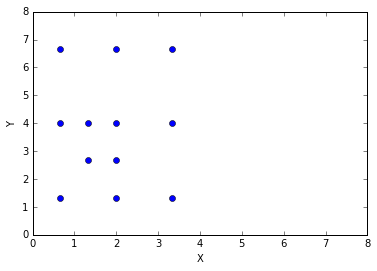

In [306]:
lx = 8
ly = 8
N = 12
dt = 0.001
v0 = 3

S = MDsystem(lx, ly, N, dt, BoundaryCondition.RBC)
S.init(StartConf.Confined, v0)

x = np.zeros(N)
y = np.zeros(N)


fig = pyplot.figure()
ax = pyplot.axes(xlim=(0, lx), ylim=(0, ly), xlabel='X', ylabel='Y')
points, = ax.plot([], [], marker='o', linestyle='None')

def animate(i):
    S.evolve()
    for n in range(S.N):
        p = S.particles[n]
        x[n] = p.x
        y[n] = p.y
    points.set_data(x, y)
    return points


anim = animation.FuncAnimation(fig, animate, frames = 1000, interval=100, blit=True)

display_animation(anim, default_mode='once')
            

### Exercise 4.4: Distribution of speeds 

Our goal is to calculate the equilibrium probability $P(v)\Delta v$ of
finding a particle with speed between $v$ and $v+\Delta v$. Obtain an
estimate of the maximum speed of the particles from the initial
configuration. Choose windows with width $\Delta v$. Each particle will
belong to the $k$-th window, with $k=v/\Delta v$. A reasonable choice of
$%
\Delta v$ is $0.1\sqrt{T}$, where $T$ is the temperature.

1.  Record the histogram of velocities $P\left( v\right) $ and plot is
    versus $v$. What is the qualitative form of $P(v)$? What is the most
    probable value for $v$? What is the approximate “width” of $P(v)$?
    This probability distribution is known as the
    Maxwell-Boltzman distribution.

2.  Determine the distribution for each component of the velocity. Make
    sure to distinguish between positive and negative values. What are
    the most probable values for the $x$ and $y$ components? What are
    the average values?

In [ ]:
nsteps = 500
v_his = np.zeros(nsteps*N)
vx_his = np.zeros(nsteps*N)
vy_his = np.zeros(nsteps*N)

S.init(StartConf.Confined, v0)

#for i in range(1000): # warmup for equilibration
    #S.evolve()

    
lefts = []
pes = []
kes = []
energies = []
j = 0    
for i in range(nsteps):
    S.evolve()
    left = 0
    for n in range(S.N):
        p = S.particles[n]
        v = p.vx*p.vx+p.vy*p.vy
        v_his[j] += math.sqrt(v)
        vx_his[j] += p.vx
        vy_his[j] += p.vy
        
        pe = S.pot_energy()
        ke = S.kinetic_energy()
        te = pe + ke
        pes.append(pe)
        kes.append(ke)
        energies.append(te)
        if (p.x < S.lx / 2.):
            left += 1
        j += 1
    lefts.append(left - S.N/2.)

pyplot.hist(v_his);
#print v_his

In [ ]:
pyplot.plot(lefts)
a = [1,2,3]
b = [4,5,6]
print(a+b)

In [ ]:
pyplot.plot(pes)

In [ ]:
pyplot.plot(kes)

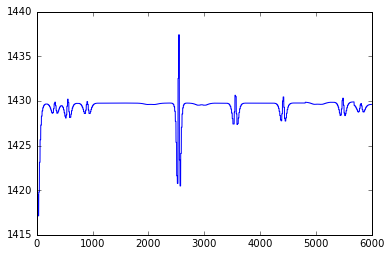

In [307]:
#es = list(map(sum, zip(pes, kes)))
es = []
for i in range(len(kes)):
    
    es.append(kes[i] + 1.171*pes[i])
    
    
pyplot.plot(es)
#print(list(zip(list(map(round,es)),list(map(round,kes)))))

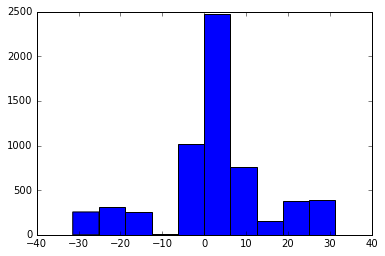

In [308]:
pyplot.hist(vx_his);

In [313]:
S.init(StartConf.Confined, v0)
nsteps = 50
target = 4
ts = []
for j in range(10):
    for i in range(nsteps):
        S.evolve()
        ke = S.kinetic_energy()
        ts.append(2*ke*2)
    
    if (j <= 5):
        S.rescale(math.sqrt(target/(2*ke)))
    
    
        
        
        

NameError: name 'sqrt' is not defined

#### Challenge 4.1:

Excercise 4.2, part 3)

#### Challenge 4.2

Excercise 4.3

#### Challenge 4.3

Excercise 4.4

Evaluation of observables
-------------------------

In the previous exercises we have used the number of particles in the
left side of the box, and the measure of the temperature $T$ to
characterize the equilibrium of the system. Other parameter that can be
used are the mean pressure $P$ and as well as the total energy $E$.

Other thermal quantity is the heat capacity $C_{V}=(\partial E/\partial
T)_{V}$. $C_{V}$ is a measure of the amount of heat needed to produce a
change in the temperature. Since this is and extensive quantity (depends
on the size of the system) it is convenient to use the specific heat $%
c_{V}=C_{V}/N$ instead. The easiest way to obtain it is to determine the
mean potential energies at neighboring temperatures $T$ and
$T+\Delta T$.

An even easier alternative is to obtain it from the kinetic energy fluctuations using a formula due to Lebowitz,
$$
\langle \delta T^2 \rangle= \frac{2}{dN}\left(1−\frac{dN}{2 C_V} \right) 
$$
where $d$ is the dimensionality of the problem.

In order to determine the mean pressure, suppose for a moment that the
container has rigid walls. We know that the collisions of particles with
the walls will cause a mean net force to be exerted on each element of
the wall. The mean force per unit of area is the pressure $P$ of the
gas. The force can be found by relating the force in the horizontal
direction to the rate of change of the linear component of the linear
momentum of the particles hitting the wall.

We can use a similar argument to calculate the pressure in the absence
of walls. Since the pressure is uniform at equilibrium, we can relate
the pressure to the transfer of momentum across an element of area
anywhere in the system. Consider an element of area $dA$ and let
$\mathbf{K}_{+}$ be the mean momentum crossing the surface per unit of
time from left to right, and let $\mathbf{K}_{-}$ be the mean momentum
crossing the surface per unit of time from right to left. The the mean
force $\mathbf{F}$ is $$\mathbf{F=K}_{+}\mathbf{-K}_{-}$$ and the mean
pressure is given by $$P=\frac{dF_{\alpha }}{dA}$$ where $F_{\alpha }$
is the component of the force normal to the element of area. (For two
dimensions, the pressure is defined per unit of length) ** **

An alternative way of calculating the pressure is from the virial
theorem:
$$PV=NkT+\frac{1}{d}\langle \sum_i^N \mathbf{r}_i \cdot \mathbf{F}_i \rangle$$

Finally the pair distribution function $g(r)$ is the probability that two atoms are separated by distance $r$. To find this function you can make a histogram of the values of $r_{ij}$ as a function of r with a histogram interval size $\delta r = 0.1$ and count the number of atom pairs that lie in each interval.

### Exercise 4.5: Equation of state of a non-ideal gas 

In this problem we compute the pressure and hence the “equation of
state” (the relation between pressure, temperature and volume) of a gas

1.  Consider $L_x=L_y=6,N=16$. Choose the initial configuration to be an
    equilibrium configuration. Compute the mean pressure using the net
    momentum transfer method and the virial theorem. Allow at least 100
    time steps for equilibration and 200 to compute averages. Is the
    pressure constant or fluctuates? How does the pressure compare with
    the ideal gas result? Which method of computing the pressure is more
    accurate?

2.  An approximate equation of state for dense gases and liquids is the
    “van der Waals” equation: $$P=kT\frac{\rho }{1-b\rho }-a\rho ^{2}.$$
    The phenomenological parameters $a$ and $b$ are related to the
    repulsive and attractive parts of the interaction respectively and
    are approximately independent of the temperature.. Use the same
    configuration to find the dependence of $P$ on $T$. Plot $P$ versus
    $T$ and use the van der Waals equation to obtain an estimate for the
    parameters $a$ and $b$.

### Exercise 4.6: Ground state energy 

Although the use of periodic boundary conditions minimizes surface
effects, it is also important to choose the symmetry of the central
“unit cell” to be consistent with the symmetry of the solid phase of the
system. This choice of cell is essential if we wish to do simulations of
the high density, low-temperature behavior. We know that the equilibrium
structure of a crystalline solid at $T=0$ is the configuration of lowest
energy.

1.  Consider a triangular lattice of with $L_x$ and height
    $L_y=\frac{\sqrt{%
    3}}{2}L_x$. Each column of the triangular lattice is separated by a
    distance $%
    a=L_x/n_{c}$ , where $n_{c}$ is the number of particles per row and
    $%
    N=n_{c}^{2}$. For a square lattice to have the same density, we have
    to choose the linear dimension to be $L=\sqrt{L_xL_y}$. Choose
    $n_{c}=6$ and determine the energy for each lattice using the
    Lennard-Jones potential. Use $L_x=5$ and $7$. What is the density of
    the system for each case? Are your results for $E/N$ independent of
    the since of the lattice? Which lattice has lower energy? Why?

2.  Consider $n_{c}=6$ and $L_x=10,20,$ and $2^{1/6}n_{c}$. Which
    lattice structure has lowest energy in each case? In all these cases
    the net force on a particle is zero. Why? The latter density
    correspond to the case where the force between nearest neighbors
    is zero. Convince yourself that at this density the lattice is
    unstable, since the force on any particle which deviates from its
    equilibrium position in the lattice is negative. Consequently, the
    system will collapse to a higher density, where the triangular
    lattice is always favored.

3.  Repeat the previous calculations for $V(r)=1/r^{6}$ and $1/r^{4}$.
    Is the triangular lattice still favored?

### Exercise 4.7: The solid state and melting 

1.  Choose the parameters $N=16$, $\Delta t=0.01$, $L_x=4$, and
    $L_y=2\sqrt{%
    3}$. Place the particles on a triangular lattice which fills the
    container and give each particle initial zero velocity. Measure the
    temperature and pressure as a function of time and plot several
    “snapshots” of the system. What is the total energy of the system?
    Does it remain a solid?

2.  Give the particles a random initial velocity with $v_{\max }=0.1$.
    What is the total energy? Equilibrate the system for approximately
    50 time steps and average the pressure and temperature over 100
    time steps.

3.  Pick an equilibrium configuration from the previous item and rescale
    all velocities by a factor 2. What is the new total energy? Take
    snapshots of the system every 25 time steps and describe the
    behavior of the motion of the particles. What is the equilibrium
    temperature and pressure of the system? After equilibrium is
    reached, rescale the velocities again in the same way. repeat this
    rescaling and measure $P(T)$ and $E(T)$ for size
    different temperatures.

4.  Plot $E(T)-E(0)$ and the pressure $P(T)$ as a function of $T$. What
    is the dependence of difference $\Delta E$ with $T$?

5.  Decrease the density by multiplying $L_x$, $L_y$ , and the particle
    coordinates by a factor $1.1$. What are your results for temperature
    and pressure? What is the nature of the snapshots? Continue
    rescaling the density and the positions until the system “melts”.
    What is your qualitative criterion for melting?

Simple transport properties
---------------------------

Suppose that we follow the trajectory of a particle and we determine its
displacement $\mathbf{r}_{i}(t_{2})-\mathbf{r}_{i}(t_{1})$. We know that
if the particle suffers zero net force, this displacement will increase
linearly. However, a particle in a fluid undergoes collisions and on the
average its net displacement will be zero. A more interesting quantity
is the mean square displacement $R(t)^{2}$ defined by
$$R(t)^{2}=\langle \left| \mathbf{r}_{i}(t_{2})-\mathbf{r}_{i}(t_{1})\right|^2
\rangle ,  $$ where $t=t_{2}-t_{1}$ and we have averaged over
all particles. Since the system is at equilibrium, this quantity depends
only on the time difference. According to Einstein relation
$$R(t)^{2}=2dDt\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,(t\rightarrow \infty )$$
where $D$ is the “self-diffusion constant”.

Another single -particle property is the “velocity autocorrelation
function” $Z(t)$. Suppose that a particle has velocity $\mathbf{v}%
_{i}(t_{1})$ at time $t_{1}$. If it suffers zero net force, its velocity
will remain constant, and hence, its velocity at a later time will
remain “correlated” with its initial velocity. However, the interactions
with the other particles in the fluid will alter its velocity, and we
expect that after some time its velocity will no longer be strongly
correlated. Hence, we define $Z(t)$ as

$$Z(t)=\langle \mathbf{v}_{i}(t_{2})\cdot \mathbf{v}_{i}(t_{1})\rangle$$
where $t=t_{2}-t_{1}$. If we define the self-diffusion constant $D$ by
relation (\[r2\]), it can be shown that $D$ is related to $Z(t)$ by
$$D=\frac{1}{d}\int_{-\infty }^{+\infty }Z(t)dt.$$ This relation is an
example of a general relation between transport coefficients such as
viscosity and thermal conductivity and autocorrelation functions.

How complicated can it get?
--------------------------------

-  More sophisticated temperature adjustments such as the Berendsen thermostat and Nose-Hoover thermostat.

-   "Rotating ice cube" problem

-   External fields

-   Plasma

-   Three dimensions

-   Complicated geometries

-   Different types of particles

-   Internal degrees of freedom (rotations)

-   Quantum mechanics

-   Parallelization